In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the data from a CSV file
data = pd.read_csv('crop_recommendation.csv')

# Extract the features and label
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Normalize the features using z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# The normalized data is now ready for training the multiple linear regression model

In [2]:
X_normalized

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [3]:
# Encode the string labels as numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [6]:
# Example new data for prediction
new_data = [[90,42,43,20,82,6.5,202]] 
# Scale the new data using the same scaler object
new_data_scaled = scaler.transform(new_data)

In [7]:
value=model.predict(new_data_scaled)
value=le.inverse_transform(value.astype(int))
value

array(['lentil'], dtype=object)

In [8]:
y_pred.size

440

In [9]:
y_test.size

440

In [10]:
y_pred-y_test

array([-1.29537459e+00, -6.89656379e+00, -6.43362292e+00, -6.00611167e+00,
        3.92179625e+00,  3.01461387e+00,  2.85252474e+00, -1.03902283e+00,
       -3.46745719e-01, -4.83272860e-01,  5.92647292e+00,  1.28397962e+01,
       -3.14038266e+00,  3.51414357e+00,  1.27043440e+01, -4.35338988e+00,
        5.84687283e+00, -3.85866703e-01, -5.75360557e+00, -9.50966346e-01,
        5.56529873e+00, -5.30934342e+00, -1.72396755e-01, -6.51251631e+00,
        2.41267480e+00,  3.75892163e+00, -2.36960362e+00, -6.55662598e-04,
       -8.54825850e+00, -9.50345460e+00, -2.70442412e+00, -2.76409190e+00,
        2.81988239e+00, -5.65122133e-01,  2.29812406e+00,  7.94589866e+00,
        2.91774212e+00,  2.88012222e+00,  4.74424805e+00,  1.53979234e-01,
       -6.68708743e+00,  1.67601929e+00,  7.12519083e+00,  4.69078683e-01,
       -1.00802166e+00, -1.77022549e+00, -8.81645379e+00,  1.33383477e+01,
       -1.95032260e+00, -1.32729770e+00,  6.96229437e+00,  5.63007818e+00,
       -1.44905463e+00, -

In [11]:
from sklearn.metrics import r2_score
# Assume y_true and y_pred are your true and predicted values
r2 = r2_score(y_test, y_pred.round())
r2

0.2517663421045213

In [12]:
# Convert the predicted values back to string labels
y_pred_labels = le.inverse_transform(y_pred.astype(int))
y_test_conv=le.inverse_transform(y_pred.astype(int))

In [13]:
# Compare the predicted labels with the available labels
comparison = pd.DataFrame({'predicted_label': y_pred_labels, 'available_label': y_test})
print(comparison)

    predicted_label  available_label
0         mothbeans               15
1          mungbean               21
2            lentil               17
3            lentil               17
4          chickpea                0
..              ...              ...
435     kidneybeans               20
436          lentil               20
437            jute                6
438     kidneybeans                6
439     kidneybeans               18

[440 rows x 2 columns]


In [14]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_conv, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


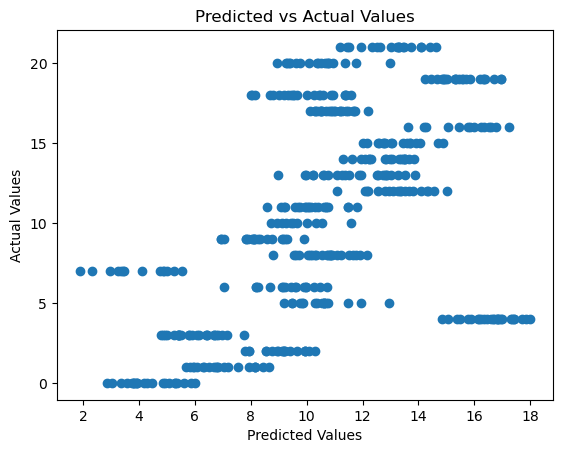

In [15]:
# Plot the predicted vs actual values
plt.scatter(y_pred,y_test)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

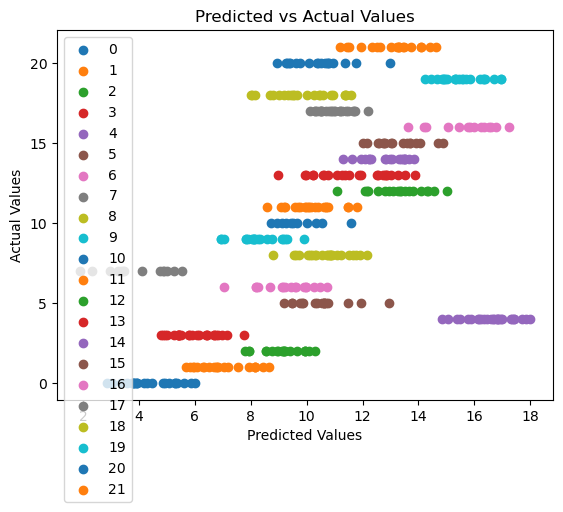

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test is a list of actual labels and y_pred is a list of predicted values
labels = np.unique(y_test) # get unique labels

# Create a scatter plot with different colors for each label
for label in labels:
    idx = y_test == label
    plt.scatter(y_pred[idx], y_test[idx], label=label)

plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
r2

0.25634813007312407

In [22]:
# Calculate Adjusted R-squared score
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)



In [23]:
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.25634813007312407
Adjusted R-squared: 0.24429821551412378
Mean Squared Error (MSE): 31.474262588659084
Root Mean Squared Error (RMSE): 5.6101927407762995
Mean Absolute Error (MAE): 4.433454392161998
